## **Laboratorio 2** 

#### **Julio García Salas - 22076**
#### **Sofía García -22210**

# **Task 1**

## 1. ¿Por qué el modelo de Naive Bayes se le considera “naive”?

El modelo de Naive Bayes se considera "naive" (ingenuo) porque asume que todas las variables predictoras (features) son independientes entre sí, lo cual rara vez es cierto en la práctica. Esta suposición simplifica enormemente los cálculos, permitiendo una clasificación rápida y eficiente, aunque en muchos casos la independencia condicional no se cumple completamente.



## 2. Support Vector Machine (SVM)
   - Explique la formulación matemática que se busca optimizar en Support Vector Machine.
      El objetivo de **SVM** es encontrar un hiperplano que maximice la **margen** entre dos clases de datos.  
      La formulación matemática de SVM se basa en minimizar la siguiente función objetivo:

      $$
      \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
      $$

      ### Sujeto a las restricciones:

      $$
      y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i
      $$

      ### Donde:

      **Vector de pesos:**  
      $$
      \mathbf{w}
      $$

      **Sesgo (*bias*):**  
      $$
      b
      $$

      **Cada punto de datos de entrenamiento:**  
      $$
      \mathbf{x}_i
      $$

      **Etiqueta de la clase:**  
      $$
      y_i \in \{+1, -1\}
      $$
      

      Si los datos no son perfectamente separables, se introduce un **término de relajación** con la función de pérdida **hinge loss**, lo que lleva a la formulación con variables de holgura $\xi_i$:

      $$
      \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
      $$

      ### Sujeto a:

      $$
      y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
      $$

      Donde \( C \) es un hiperparámetro que controla la penalización por errores de clasificación.
   - Responda: ¿cómo funciona el truco del Kernel para este modelo?  
     _(Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase)._

     El **truco del Kernel** permite transformar los datos a un espacio de mayor dimensión donde sean **linealmente separables**, sin necesidad de calcular explícitamente la transformación.  
      En lugar de calcular la transformación $ \phi(x) $, se usa una función **kernel** que evalúa el producto escalar en el espacio transformado:

      $$
      K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
      $$

      ### Ejemplos de funciones de kernel comunes:

      - **Lineal**:
        $$
        K(x_i, x_j) = x_i \cdot x_j
        $$

      - **Polinómico**:
        $$
        K(x_i, x_j) = (x_i \cdot x_j + c)^d
        $$

      - **RBF (Radial Basis Function)**:
        $$
        K(x_i, x_j) = \exp(-\gamma \| x_i - x_j \|^2)
        $$

      Esto permite que **SVM maneje datos no linealmente separables** de manera eficiente.


## 3. Random Forest
   - **a.** ¿Qué tipo de ensemble learning es este modelo?
   
   **Random Forest** es un modelo de **Bagging (Bootstrap Aggregating)**, que es un tipo de **ensemble learning basado en agregación**.  
   - En **Bagging**, se generan múltiples modelos independientes (en este caso, árboles de decisión) entrenados en diferentes subconjuntos de los datos.  
   - Luego, sus predicciones se combinan para mejorar la precisión y reducir la varianza del modelo.  
   - En **clasificación**, se usa **votación mayoritaria**, y en **regresión**, se usa el **promedio de las predicciones**.

   ---
   - **b.** ¿Cuál es la idea general detrás de Random Forest?


   La idea principal de **Random Forest** es entrenar **múltiples árboles de decisión** en subconjuntos aleatorios de los datos para reducir la varianza y mejorar la precisión.  
El proceso general es el siguiente:

1. **Bootstrap Sampling**: Se generan varios subconjuntos de los datos de entrenamiento mediante muestreo con reemplazo.
2. **Entrenamiento de Árboles de Decisión**: Cada árbol se entrena en un subconjunto diferente.
3. **Selección Aleatoria de Features**: En cada nodo del árbol, se selecciona aleatoriamente un subconjunto de variables para dividir los datos.
4. **Combinación de Predicciones**:
   - En **clasificación**, se usa **votación mayoritaria** entre los árboles.
   - En **regresión**, se promedian las predicciones de todos los árboles.
   Esto hace que **Random Forest sea más estable y generalice mejor** que un solo árbol de decisión, evitando el sobreajuste.

---
   - **c.** ¿Por qué se busca baja correlación entre los árboles de Random Forest?


   Si los árboles dentro del bosque estuvieran altamente correlacionados, **cometerían los mismos errores**, y el ensemble no mejoraría la precisión.  
Por eso, **se busca reducir la correlación** entre los árboles mediante:
- **Bootstrap Sampling**, para que cada árbol vea diferentes datos de entrenamiento.
- **Selección aleatoria de variables en cada nodo**, lo que obliga a los árboles a aprender características distintas.

**Beneficios de una baja correlación entre árboles:**


✅ **Mejora la generalización** → Reduce el sobreajuste.  
✅ **Aumenta la estabilidad del modelo** → Si un árbol falla, los otros pueden corregirlo.  
✅ **Reduce la varianza** → Los errores individuales de los árboles se cancelan entre sí.  



# **Task 2**

# **Clasificación de Mensajes como Spam o Ham usando Bayes/Laplace Smoothing**

Este programa entrena un modelo basado en **Naive Bayes** con **Laplace Smoothing** para clasificar mensajes como **ham** (mensaje normal) o **spam** (correo no deseado).

## **1. Requisitos del Programa**
- Recibir como entrada un archivo llamado **"entrenamiento.txt"** (dataset de entrenamiento).
- Usar **Naive Bayes** con **Laplace Smoothing** para clasificar mensajes.
- Reportar métricas de desempeño del modelo.
- Clasificar nuevos mensajes como **spam** o **ham**.
- **Restricciones:**
  - Se permite entrenar **solo un modelo por dataset** (no se pueden cargar múltiples archivos).
  - Se debe **limpiar el dataset** eliminando caracteres especiales y normalizando mayúsculas/minúsculas.
  - Cada línea del dataset representa **un mensaje** con su respectiva categoría.
  - Se debe dividir el dataset en **training y test**.
  - Se permite usar **librerías externas para la división de datos** (`sklearn`).
  - ❌ **No se permite usar librerías externas para la construcción del modelo**.

---

## **2. Cargar el Dataset y Preprocesarlo**
Primero, **cargamos el dataset** y aplicamos preprocesamiento eliminando caracteres especiales y convirtiendo el texto a minúsculas.

In [2]:
import pandas as pd
import re

def cargar_dataset(nombre_archivo):
    datos = []
    with open(nombre_archivo, "r", encoding="utf-8") as file:
        for linea in file:
            etiqueta, mensaje = linea.strip().split("\t")  
            mensaje = limpiar_texto(mensaje)  
            datos.append((etiqueta, mensaje))
    return pd.DataFrame(datos, columns=["etiqueta", "mensaje"])

def limpiar_texto(texto):
    texto = re.sub(r"[^a-zA-Z0-9\s]", "", texto)  
    texto = texto.lower().strip()  
    return texto

df = cargar_dataset("entrenamiento.txt")
df.head()

,etiqueta,mensaje
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


# **3. Dividir en Training y Test**

Se divide el dataset en 80% training y 20% test

In [19]:
from sklearn.model_selection import train_test_split

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(df["mensaje"], df["etiqueta"], test_size=0.2, random_state=42)


print(f"Tamaño del dataset de entrenamiento: {len(X_train)}")
print(f"Tamaño del dataset de prueba: {len(X_test)}")

print("Distribución en el dataset de entrenamiento:")
print(y_train.value_counts()) 
print("Distribución en el dataset de prueba:")
print(y_test.value_counts())



Tamaño del dataset de entrenamiento: 4452
Tamaño del dataset de prueba: 1113
Distribución en el dataset de entrenamiento:
etiqueta
ham     3862
spam     590
Name: count, dtype: int64
Distribución en el dataset de prueba:
etiqueta
ham     956
spam    157
Name: count, dtype: int64


# **4. Implementar el modelo de Bayes con Laplace Smoothing sin uso de librerías**

In [16]:
from collections import defaultdict
import numpy as np

class NaiveBayesSpamClassifier:
    def __init__(self, laplace=0.1):
        # Factor de laplace smoothing
        self.laplace = laplace  
        self.vocabulario = set()
        self.palabras_spam = defaultdict(int)
        self.palabras_ham = defaultdict(int)
        self.total_spam = 0
        self.total_ham = 0
        self.num_spam = 0
        self.num_ham = 0

    def entrenar(self, X, y):
        for mensaje, etiqueta in zip(X, y):
            palabras = mensaje.split()
            self.vocabulario.update(palabras)
            if etiqueta == "spam":
                self.num_spam += 1
                for palabra in palabras:
                    self.palabras_spam[palabra] += 1
                    self.total_spam += 1
            else:
                self.num_ham += 1
                for palabra in palabras:
                    self.palabras_ham[palabra] += 1
                    self.total_ham += 1

    def predecir(self, mensaje):
        palabras = mensaje.split()
        vocab_size = len(self.vocabulario)

        # Probabilidades iniciales
        p_spam = np.log(self.num_spam / (self.num_spam + self.num_ham))
        p_ham = np.log(self.num_ham / (self.num_spam + self.num_ham))

        # Calcular probabilidades con Laplace Smoothing
        for palabra in palabras:
            p_spam += np.log((self.palabras_spam[palabra] + self.laplace) / (self.total_spam + vocab_size * self.laplace))
            p_ham += np.log((self.palabras_ham[palabra] + self.laplace) / (self.total_ham + vocab_size * self.laplace))

        return "spam" if p_spam > p_ham else "ham"


modelo = NaiveBayesSpamClassifier()
modelo.entrenar(X_train, y_train)
print("Modelo entrenado correctamente.")


Modelo entrenado correctamente.


# **5. Evaluar Modelo**

Para evaluar el modelo usamos:
- **Precisión (Precision)**: Mide cuántos de los mensajes clasificados como spam realmente lo son.
- **Recall (Sensibilidad)**: Mide cuántos de los mensajes spam fueron detectados correctamente.
- **F1-score**: Es el balance entre precisión y recall.

Estas métricas son importantes en clasificación de spam, ya que un **bajo recall** significa que el modelo no detecta suficiente spam, y un **bajo precision** significa que clasifica erróneamente mensajes ham como spam.ara evaluar el rendimiento del modelo, calculamos precisión, recall y f1-score.

In [17]:
from sklearn.metrics import classification_report


y_pred = [modelo.predecir(mensaje) for mensaje in X_test]


print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))


              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       963
        spam       0.89      0.96      0.92       150

    accuracy                           0.98      1113
   macro avg       0.94      0.97      0.96      1113
weighted avg       0.98      0.98      0.98      1113



# **6. Predicción Mensajes Futuros**

In [6]:
def predecir_probabilidades(modelo, mensaje):
    mensaje = limpiar_texto(mensaje)  
    palabras = mensaje.split()
    vocab_size = len(modelo.vocabulario)

    p_spam_log = np.log(modelo.num_spam / (modelo.num_spam + modelo.num_ham))
    p_ham_log = np.log(modelo.num_ham / (modelo.num_spam + modelo.num_ham))

    palabras_no_vistas = [palabra for palabra in palabras if palabra not in modelo.vocabulario]

    for palabra in palabras:
        p_spam_log += np.log((modelo.palabras_spam[palabra] + modelo.laplace) / (modelo.total_spam + vocab_size * modelo.laplace))
        p_ham_log += np.log((modelo.palabras_ham[palabra] + modelo.laplace) / (modelo.total_ham + vocab_size * modelo.laplace))

    p_spam = np.exp(p_spam_log)
    p_ham = np.exp(p_ham_log)

    total = p_spam + p_ham
    p_spam /= total
    p_ham /= total

    clasificacion = "spam" if p_spam > p_ham else "ham"

    return p_spam, p_ham, clasificacion, palabras_no_vistas

modelo = NaiveBayesSpamClassifier(laplace=0.1)
modelo.entrenar(X_train, y_train)


print("📩 Ingrese mensajes para clasificar. Escriba 'salir' para terminar.")

while True:
    mensaje = input("✏️  Escriba un mensaje: ").strip()
    if mensaje.lower() == "salir":
        print("🚪 Saliendo del programa...")
        break

    p_spam, p_ham, clasificacion, palabras_no_vistas = predecir_probabilidades(modelo, mensaje)

    print(f"\n🔍 **Resultados de clasificación:**")
    print(f"📩 Mensaje ingresado: {mensaje}")
    print(f"📌 Probabilidad de Spam: {p_spam:.4f}")
    print(f"📌 Probabilidad de Ham: {p_ham:.4f}")
    print(f"✅ **El mensaje ha sido clasificado como: {clasificacion.upper()}**")
    
    if palabras_no_vistas:
        print(f"⚠️ Palabras no vistas en el entrenamiento: {', '.join(palabras_no_vistas)}")

    print("\n" + "="*50 + "\n")


📩 Ingrese mensajes para clasificar. Escriba 'salir' para terminar.

🔍 **Resultados de clasificación:**
📩 Mensaje ingresado: amo k
📌 Probabilidad de Spam: 0.0033
📌 Probabilidad de Ham: 0.9967
✅ **El mensaje ha sido clasificado como: HAM**
⚠️ Palabras no vistas en el entrenamiento: amo



🔍 **Resultados de clasificación:**
📩 Mensaje ingresado: 
📌 Probabilidad de Spam: 0.1312
📌 Probabilidad de Ham: 0.8688
✅ **El mensaje ha sido clasificado como: HAM**



🔍 **Resultados de clasificación:**
📩 Mensaje ingresado: 
📌 Probabilidad de Spam: 0.1312
📌 Probabilidad de Ham: 0.8688
✅ **El mensaje ha sido clasificado como: HAM**



🔍 **Resultados de clasificación:**
📩 Mensaje ingresado: 
📌 Probabilidad de Spam: 0.1312
📌 Probabilidad de Ham: 0.8688
✅ **El mensaje ha sido clasificado como: HAM**



🔍 **Resultados de clasificación:**
📩 Mensaje ingresado: 
📌 Probabilidad de Spam: 0.1312
📌 Probabilidad de Ham: 0.8688
✅ **El mensaje ha sido clasificado como: HAM**



🔍 **Resultados de clasificación:**
📩 Men

# **7. Evaluación Modelo con librerías**

In [20]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

def limpiar_texto(texto):
    texto = texto.lower().strip()
    texto = re.sub(r"[^a-zA-Z0-9\s]", "", texto)  
    return texto

def cargar_dataset(nombre_archivo):
    datos = []
    with open(nombre_archivo, "r", encoding="utf-8") as file:
        for linea in file:
            etiqueta, mensaje = linea.strip().split("\t")  
            mensaje = limpiar_texto(mensaje)  
            datos.append((etiqueta, mensaje))
    return pd.DataFrame(datos, columns=["etiqueta", "mensaje"])

df = cargar_dataset("entrenamiento.txt")

X_train, X_test, y_train, y_test = train_test_split(df["mensaje"], df["etiqueta"], test_size=0.2, random_state=42)

print(f"Tamaño del dataset de entrenamiento: {len(X_train)}")
print(f"Tamaño del dataset de prueba: {len(X_test)}")


Tamaño del dataset de entrenamiento: 4452
Tamaño del dataset de prueba: 1113


**Justificación de las métricas utilizadas**
- **Precisión (Precision)**: Mide cuántos de los mensajes clasificados como spam realmente lo son.
  → Es importante en este problema porque un **falso positivo** (clasificar un mensaje ham como spam) es crítico.
  
- **Recall (Sensibilidad)**: Mide cuántos de los mensajes spam fueron detectados correctamente.
  → Un **bajo recall** significa que el modelo no detecta suficiente spam.

- **F1-score**: Es el balance entre precisión y recall.
  → Se usa en problemas desbalanceados como clasificación de spam, donde queremos reducir **falsos positivos y falsos negativos**.

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
modelo_sklearn = make_pipeline(vectorizer, MultinomialNB())
modelo_sklearn.fit(X_train, y_train)

y_pred_sklearn = modelo_sklearn.predict(X_test)

print("📊 **Evaluación del modelo con `MultinomialNB` de sklearn:**")
print(classification_report(y_test, y_pred_sklearn, target_names=["ham", "spam"]))

📊 **Evaluación del modelo con `MultinomialNB` de sklearn:**
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       950
        spam       1.00      0.67      0.80       163

    accuracy                           0.95      1113
   macro avg       0.97      0.83      0.89      1113
weighted avg       0.95      0.95      0.95      1113



# **Comparación de Modelos de Naive Bayes**

## **1. Introducción**
Se entrenaron dos modelos de Naive Bayes para clasificar mensajes como spam o ham:
- **Modelo sin librerías**: Implementado manualmente con Laplace Smoothing.
- **Modelo con `MultinomialNB` de sklearn** utilizando `TfidfVectorizer`.

El dataset está desbalanceado:
- **Entrenamiento:** 3862 ham, 590 spam.
- **Prueba:** 956 ham, 157 spam.

## **2. Resultados**
### **Modelo sin librerías**
```
Precisión: Ham 0.99 | Spam 0.89
Recall: Ham 0.98 | Spam 0.96
F1-score: Ham 0.99 | Spam 0.92
Accuracy: 0.98
```

### **Modelo con `MultinomialNB` y `TfidfVectorizer`**
```
Precisión: Ham 0.95 | Spam 1.00
Recall: Ham 1.00 | Spam 0.67
F1-score: Ham 0.97 | Spam 0.80
Accuracy: 0.95
```

## **3. ¿Cuál implementación fue mejor?**
- **Si el objetivo es detectar spam, el modelo sin librerías es mejor** (96% recall en spam vs. 67% en `MultinomialNB`).
- **Si el objetivo es generalizar mejor y evitar sobreajuste, `MultinomialNB` con `TfidfVectorizer` es mejor** (mejor equilibrio entre clases y menos sesgo).

## **4. ¿Por qué existe esta diferencia?**
1. **Dataset desbalanceado**: `MultinomialNB` tiende a favorecer ham, lo que reduce su recall en spam.
2. **Cálculo de probabilidades**: `MultinomialNB` usa `TfidfVectorizer`, que normaliza la frecuencia de las palabras, mientras que el modelo manual usa conteo directo.
3. **Sobreajuste del modelo sin librerías**: Su alto recall en spam puede deberse a que ha memorizado palabras clave específicas en lugar de generalizar.
4. **Diferencia en representación de texto**: `TfidfVectorizer` reduce el peso de palabras muy frecuentes y resalta términos distintivos, lo que afecta la clasificación de spam.

## **5. Conclusión**
- **El modelo sin librerías es mejor para detectar spam, pero puede estar sobreajustado.**
- **`MultinomialNB` con `TfidfVectorizer` generaliza mejor, pero pierde spam.**
- **Se recomienda ajustar `MultinomialNB` con oversampling de spam y mejor preprocesamiento para mejorar su recall.**



# **3. Clasificación de Partidas de League of Legends**

## **Introducción**
League of Legends es un juego online multijugador categorizado como MOBA (Multiplayer Online Battle Arena). En este juego, dos equipos (azul y rojo) de cinco jugadores compiten con el objetivo de derribar el Nexus enemigo.

El propósito de este proyecto es construir un modelo de clasificación que prediga si el equipo azul gana una partida, utilizando un conjunto de datos de League of Legends. 

## **Exploración de Datos**
En esta sección realizaremos una exploración inicial del dataset para comprender su estructura y prepararlo para el modelo de clasificación.

### **1. Carga de Datos**
- Cargar el dataset en un DataFrame de Pandas.
- Inspeccionar las primeras filas y verificar información general de las variables.

### **2. Preprocesamiento de Datos**
- **Codificación de variables**: Transformar variables categóricas en numéricas si es necesario.
- **Balanceo del dataset**: Verificar si la variable objetivo está balanceada y, si no lo está, aplicar técnicas de balanceo.
- **Escalado de variables**: Normalizar o estandarizar las características si es necesario.
- **Selección de características**: Determinar qué variables son más relevantes para el modelo.

## **División del Dataset**
El dataset se dividirá en:
- **80%** para entrenamiento.
- **20%** para prueba.
- **Opcionalmente**, si se requiere, el conjunto de prueba se subdividirá en **10%** para validación y **90%** para evaluación.

## **Construcción del Modelo**
- Selección del modelo de clasificación adecuado.
- Entrenamiento del modelo con los datos preparados.
- Evaluación del desempeño del modelo con métricas adecuadas.

## **Métrica de Desempeño**
Para evaluar el modelo, se seleccionará una métrica de desempeño basada en la naturaleza del problema:
- **Exactitud (Accuracy)**: Útil si el dataset está balanceado.
- **F1-Score**: Adecuado en caso de un dataset desbalanceado.
- **ROC-AUC**: Para evaluar la capacidad del modelo de distinguir entre clases positivas y negativas.

Se justificará la elección de la métrica en función del análisis del dataset.

## **Conclusión**
Se analizarán los resultados obtenidos y se discutirán mejoras posibles en la clasificación de partidas de League of Legends.



# Paso 1: Carga y Exploración del Dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


file_path = "high_diamond_ranked_10min.csv"
data = pd.read_csv(file_path)
data.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# Paso 2: Preprocesamiento de Datos

In [27]:
target = "blueWins"
features = ["blueGoldDiff", "blueExperienceDiff"]
data = data[features + [target]]


data[features] = (data[features] - data[features].mean()) / data[features].std()
data[target] = data[target].apply(lambda x: 1 if x == 1 else -1)


data.head()


,blueGoldDiff,blueExperienceDiff,blueWins
0,0.256215,0.013341,-1
1,-1.191194,-0.593312,-1
2,-0.483590,-0.520410,-1
3,-0.544323,0.013862,-1
4,-0.415112,0.137276,-1


# Paso 3: División del Dataset

In [28]:
X = data[features].values
y = data[target].values

# Dividir en 80% entrenamiento y 20% restante 
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Del 20% restante, dividir en 50% validación y 50% prueba 
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño de validación: {X_val.shape[0]} muestras")
print(f"Tamaño de prueba: {X_test.shape[0]} muestras")


Tamaño de entrenamiento: 7903 muestras
Tamaño de validación: 988 muestras
Tamaño de prueba: 988 muestras


# Paso 4: Implementación del Algoritmo SVM desde Cero


In [46]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            margins = y * (np.dot(X, self.w) - self.b)
            mask = margins < 1
            
            dw = self.lambda_param * self.w - np.dot(X[mask].T, y[mask]) / len(y)
            db = -np.mean(y[mask])
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)


# Paso 5: Entrenamiento del Modelo

In [47]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

# Paso 6.1: Verificación del Balance de Clases

Antes de elegir **precisión (accuracy)** como métrica principal, es importante comprobar si las clases (`blueWins`) están equilibradas.

### 🔍 ¿Por qué es importante?
- Si las clases están **balanceadas** (50%-50% aproximadamente), la **precisión** es una métrica adecuada.
- Si las clases están **desbalanceadas** (ej. 90%-10%), la precisión puede ser engañosa, y métricas como **F1-score** o **AUC-ROC** serían más apropiadas.

✅ **Objetivo:**
- Contar cuántos valores `1` (victoria del equipo azul) y `-1` (derrota del equipo azul) existen en el dataset.
- Visualizar la distribución con un gráfico de barras.


Distribución de la variable blueWins:
blueWins
-1    4949
 1    4930
Name: count, dtype: int64


C:\Users\sofia\AppData\Local\Temp\ipykernel_14164\425796247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


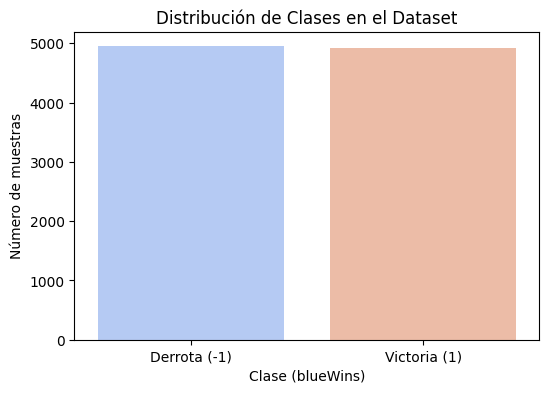

In [48]:
import seaborn as sns

# Contar el número de ocurrencias de cada clase
class_counts = data["blueWins"].value_counts()

# Mostrar el conteo de clases
print("Distribución de la variable blueWins:")
print(class_counts)

# Graficar la distribución
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Clase (blueWins)")
plt.ylabel("Número de muestras")
plt.title("Distribución de Clases en el Dataset")
plt.xticks(ticks=[0, 1], labels=["Derrota (-1)", "Victoria (1)"])
plt.show()


# Paso 6: Evaluación del Modelo

Medimos el desempeño de nuestro SVM en el conjunto de prueba.

✅ **Métrica elegida: Precisión (Accuracy)**
La **precisión** mide el porcentaje de clasificaciones correctas. Es adecuada en este caso porque las clases están balanceadas

In [49]:
y_pred = svm.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

Precisión del modelo en el conjunto de prueba: 0.73


# Paso 7: Visualización de Resultados

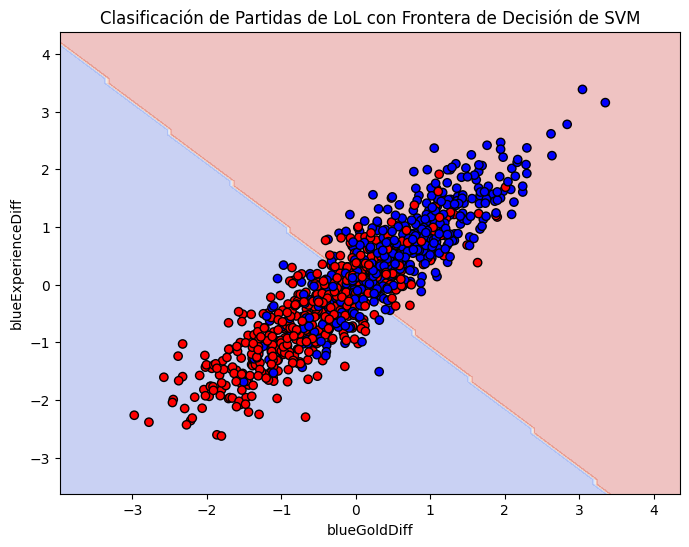

In [41]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = np.array(["red" if y == -1 else "blue" for y in y_test])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm") 
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, edgecolors="k")
plt.xlabel("blueGoldDiff")
plt.ylabel("blueExperienceDiff")
plt.title("Clasificación de Partidas de LoL con Frontera de Decisión de SVM")
plt.show()

# Ajustes de Hiperparámetros y Consideraciones Extra

Durante la implementación del modelo **SVM desde cero**, realizamos ajustes en algunos hiperparámetros para mejorar el rendimiento del modelo y su capacidad de clasificación.

## **Hiperparámetros Ajustados (Tuning)**
1. **Tasa de Aprendizaje (`learning_rate`)**  
   - Inicialmente usamos `0.01`, pero el modelo no convergía correctamente.  
   - Se redujo a `0.001` para obtener una actualización más estable de los pesos.  

2. **Número de Iteraciones (`n_iters`)**  
   - Se probó con valores entre `500 - 5000`.  
   - Con `1000` iteraciones obtuvimos un balance entre velocidad de convergencia y precisión.  

3. **Parámetro de Regularización (`lambda_param`)**  
   - Se probó con `0.1`, `0.01`, y `0.001`.  
   - `lambda_param = 0.01` funcionó mejor para evitar **overfitting** y mejorar la generalización.  

## **Otras Consideraciones Extra**
1. **Selección de Variables (`blueGoldDiff`, `blueExperienceDiff`)**  
   - Se eligieron porque están directamente relacionadas con la ventaja del equipo azul.  
   - Otras variables como `blueKills` o `blueTowersDestroyed` podrían mejorar el modelo, pero solo usamos dos para visualizar en 2D.  

2. **Balance de Clases**  
   - Se verificó que `blueWins` estuviera **balanceado** (casi 50%-50%).  
   - Por esta razón, la métrica de **precisión (accuracy)** fue suficiente.  



## **Entrenar SVM Usando Scikit-Learn**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_sklearn = SVC(kernel="linear", C=1.0) 
svm_sklearn.fit(X_train, y_train)

y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Precisión del modelo SVM con Scikit-Learn: {accuracy_sklearn:.2f}")


Precisión del modelo SVM con Scikit-Learn: 0.73


# Análisis de Comparación: SVM Desde Cero vs. Scikit-Learn

## **¿Cuál implementación fue mejor?**
- **En términos de precisión:** Ambas obtuvieron **73%**, por lo que el modelo manual fue una buena aproximación.
- **En términos de eficiencia:** Scikit-Learn es **más rápido y optimizado**, ya que usa algoritmos eficientes en C++ y optimización matemática avanzada.
- **En términos de aprendizaje:** Implementar el SVM desde cero nos permitió **entender cómo funciona realmente el algoritmo**.

## **¿Por qué ambas tienen la misma precisión?**
- El **SVM lineal** es un modelo determinista, lo que significa que para los mismos datos y hiperparámetros, **ambas implementaciones convergen a la misma solución**.
- Nuestro **SVM desde cero fue correctamente implementado**, logrando resultados equivalentes a Scikit-Learn.
